In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 初步观察数据结构
### 载入数据

In [2]:
path =r'.\mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

### 查看数据个数
> 训练数据60000个，测试数据10000个

In [3]:
print('train data=',len(x_train))
print('test_data=',len(x_test))

train data= 60000
test_data= 10000


### 查看训练数据
> x_train是单色的数字图像，y_train是数字图像的真实值

In [5]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (60000, 28, 28)
y_train (60000,)


##### 显示数字图像

In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)#设置图像的大小
    plt.imshow(image,cmap='binary')#image参数是28*28的图像，参数binary表示以黑白灰度显示
    plt.show()

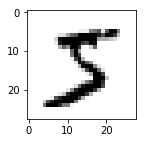

In [7]:
plot_image(x_train[0])#查看图像

In [8]:
y_train#查看label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 写函数显示多项MNIST数据的images和label

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):#num为要显示的数据项数默认为10
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)#子图形为5行5列
        
        ax.imshow(images[idx],cmap='binary')           
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

##### 查看前十项训练数据

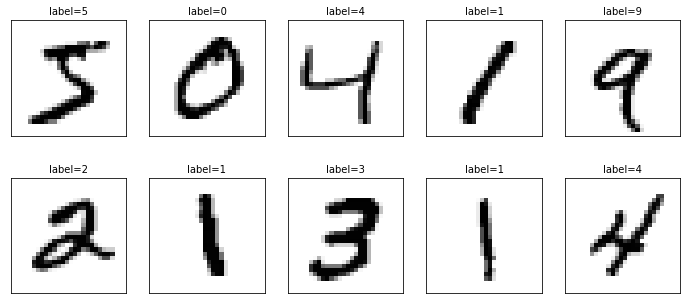

In [10]:
plot_images_labels_prediction(x_train,
                              y_train,[],0,10)

##### 在看看训练集数据

In [11]:
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_test: (10000, 28, 28)
y_test: (10000,)


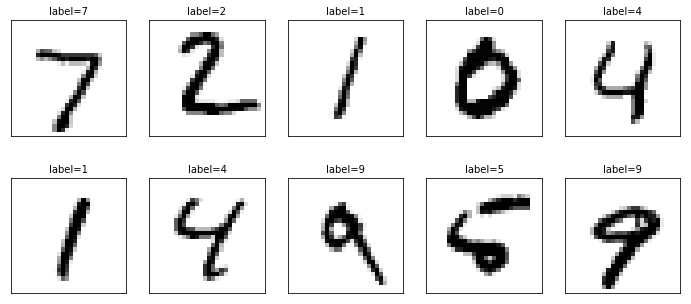

In [12]:
#显示测试数据前十项
plot_images_labels_prediction(x_test,
                              y_test,[],0)

## 对数据进行预处理
### 对图像数据进行预处理
> feature数据预处理
1.  将数字图像转换为一维向量，其长度为784，并且直接转换为Float
2.  数字图像image的数字标准化

In [13]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_train: (60000, 28, 28)
y_train: (60000,)


In [14]:
x_Train = x_train.reshape(60000,784).astype('float32')
x_Test = x_test.reshape(10000,784).astype('float32')

In [15]:
print('x_train:',x_Train.shape)
print('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [16]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
#对images数据进行标准化
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [18]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

> label数据预处理（One-Hot Encoding,一位有效编码）


独热编码即 One-Hot-coding，又称一位有效编码，其方法是使用N位状态寄存器来对N个状态进行编码，每个状态都由他独立的寄存器位，并且在任意时候，其中只有一位有效。
例如对六个状态进行编码：
自然顺序码为 000,001,010,011,100,101
独热编码则是 000001,000010,000100,001000,010000,100000

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

##### 对标签数据进行One-Hot Encoding转换

In [20]:
y_trainOneHot = np_utils.to_categorical(y_train)
x_testOneHot = np_utils.to_categorical(x_test)
y_testOneHot = np_utils.to_categorical(y_test)

In [21]:
y_trainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 建立模型

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [23]:
model=Sequential()#建立线性堆叠模型

##### 建立输入层与隐藏层

In [24]:
model.add(Dense(units=1000,#隐藏层神经元个数
         input_dim=784,#设置输入层神经元个数为784
         kernel_initializer='normal',#用正态分布的随机数来初始化权重和偏差
         activation='relu'))#设置激活函数为relu

In [25]:
model.add(Dropout(0.5))#Dropout设置为50%

In [26]:
model.add(Dense(units=1000,
         input_dim=784,
         kernel_initializer='normal',
         activation='relu'))

In [27]:
model.add(Dropout(0.5))

##### 建立输出层

In [28]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

##### 查看模型摘要

In [29]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


##### 定义训练方式

In [30]:
model.compile(loss='categorical_crossentropy',#设置损失函数
             optimizer='adam',#使用adam优化器让训练更快收敛
             metrics=['accuracy'])#设置评估模式的方式是准确率

In [31]:
#开始训练
train_history=model.fit(x=x_Train_normalize,
                       y=y_trainOneHot,validation_split=0.2,#训练数据为80%
                       epochs=10,batch_size=200,verbose=2)#epoches训练周期,
                        #200为每一批数据个数,verbose=2显示训练过程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 42s - loss: 0.3659 - acc: 0.8851 - val_loss: 0.1325 - val_acc: 0.9608
Epoch 2/10
 - 32s - loss: 0.1585 - acc: 0.9515 - val_loss: 0.0995 - val_acc: 0.9700
Epoch 3/10
 - 32s - loss: 0.1186 - acc: 0.9629 - val_loss: 0.0854 - val_acc: 0.9740
Epoch 4/10
 - 31s - loss: 0.0984 - acc: 0.9690 - val_loss: 0.0840 - val_acc: 0.9751
Epoch 5/10
 - 31s - loss: 0.0850 - acc: 0.9723 - val_loss: 0.0861 - val_acc: 0.9746
Epoch 6/10
 - 31s - loss: 0.0763 - acc: 0.9757 - val_loss: 0.0741 - val_acc: 0.9782
Epoch 7/10
 - 36s - loss: 0.0661 - acc: 0.9785 - val_loss: 0.0713 - val_acc: 0.9778
Epoch 8/10
 - 37s - loss: 0.0588 - acc: 0.9813 - val_loss: 0.0805 - val_acc: 0.9778
Epoch 9/10
 - 37s - loss: 0.0549 - acc: 0.9823 - val_loss: 0.0737 - val_acc: 0.9790
Epoch 10/10
 - 34s - loss: 0.0534 - acc: 0.9831 - val_loss: 0.0794 - val_acc: 0.9788


## 可视化训练过程

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):#输入参数分别为，train_history,
                                                        #训练数据的执行结果，验证数据的执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

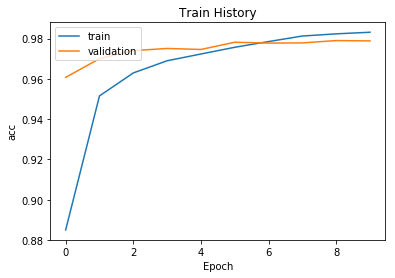

In [33]:
show_train_history(train_history,'acc','val_acc')

 这里有个问题：为何‘acc训练的准确率’比‘val_acc验证的准确率’高？
> 这是因为训练的数据不一样，前者为用训练的数据来计算准确率，因为相同的数据已经训练过了，有拿来计算准确率，准确率自然比较高，而后者使用验证数据计算准确率。

##### 用测试数据来评估模型的准确率

In [34]:
scores=model.evaluate(x_Test_normalize,y_testOneHot)
print()
print('accuracy=',scores[1])#scores是一个列表第一个是误差，第二个代表正确率，两者相加大约为1

10000/10000 [==============================] - 4s 406us/step

accuracy= 0.9796


## 进行预测
##### 执行预测

In [35]:
prediction=model.predict_classes(x_Test)

In [36]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

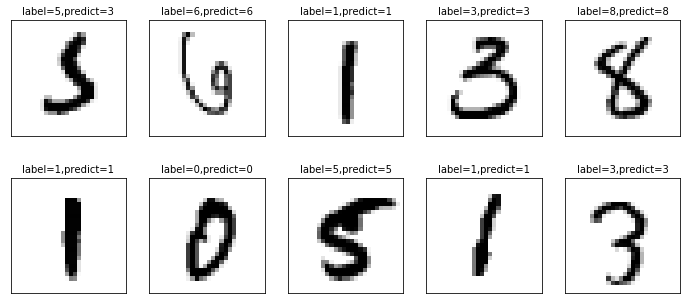

In [37]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=340)#idx为开始显示的数据index(340到349)

## *显示混淆矩阵*
> 混淆矩阵也称误差矩阵，是表示精度评价的一种标准格式，用n行n列的矩阵形式来表示。具体评价指标有总体精度、制图精度、用户精度等，这些精度指标从不同的侧面反映了图像分类的精度。在人工智能中，混淆矩阵（confusion matrix）是可视化工具，特别用于监督学习，在无监督学习一般叫做匹配矩阵。在图像精度评价中，主要用于比较分类结果和实际测得值，可以把分类结果的精度显示在一个混淆矩阵里面。混淆矩阵是通过将每个实测像元的位置和分类与分类图像中的相应位置和分类相比较计算的。

In [38]:
import pandas as pd
pd.crosstab(y_test,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,1,3,1,0,1,5,1,1,0
1,0,1124,5,1,0,1,3,0,1,0
2,1,0,1021,1,2,0,1,4,2,0
3,0,0,8,990,0,2,0,5,3,2
4,1,2,3,0,967,0,4,0,0,5
5,2,0,0,10,1,869,4,1,2,3
6,1,2,0,1,3,5,946,0,0,0
7,0,8,7,1,2,0,0,1001,2,7
8,1,0,7,7,4,7,5,5,935,3


> 对角线是预测正确的数字，其他非对角线的数字代表将某一个标签预测错误成另一个标签

###### 找出真实值是5而预测值是3的数据

In [39]:
df = pd.DataFrame({'label':y_test,'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3
5972,5,3
9422,5,3
